In [1]:
from pylab import *
import radmc3dPy as rpy
import numpy as np
import os
from scipy.interpolate import griddata
from models import *
from IPython import display

In [2]:
md0=load_model(outdir='/noshear/')
md1=load_model(outdir='/shear1/')
md2=load_model(outdir='/shear2/')

stellar_params: {'Ms': 0.2, 'Rs': 2.0, 'Ts': 4000.0, 'accrate': 1e-07, 'f': 0.01}
disk_params: {'Mdisk': 0.015, 'Mfrac': [0.005, 0.005], 'R0': [1, 1], 'Rout': [100, 50], 'H0': [1, 0.3], 'p': [-1, -1], 'fi': [0.25, 0.25], 'Rdisk': [120, 120]}
envelope_params: {'Min': 1e-06, 'Rc': 120, 'rho_amb': 1e-25, 'rho_0': 3e-22, 'theta_min': 15, 'exf': 0.25, 'Rmax': 15000.0, 'd2g': 0.01, 'shock': False}
grid_params: {'N': [180, 90, 48], 'min': [0.1, 0.19634954084936207, 0], 'max': [400, 1.5707963267948966, 6.283185307179586], 'spacing': ['log', 'lin', 'lin']}
dust_params: {'rho_si': 3.1518, 'amin_chem': 0.06, 'amax_ism': 1.0, 'amin': [0.005, 0.005], 'amax': [1, 1000.0], 'apow': 3.5}
RT_params: {'cr_model': 'ssx', 'zetacr': 1.3e-17, 'LX': 1e+30, 'G0': 1, 'viscous_heating': True}
directory exists - will overwrite current model if you write to it!
Loading from model directory:/Users/aleksandra/Desktop/wedgeford/noshear/
Reading amr_grid.inp
Reading wavelength_micron.inp
stellar_params: {'Ms': 0.2, 'R

In [3]:
class observe:
    def __init__(self,output,incl=0,wav=870,dpc=140,npix=300,sizeau=300,beam_au=[30,20],fwhm=[None,None]):
        pars = {'incl':incl,'wav':wav,'npix':npix,'sizeau':sizeau}
        self.dpc = dpc
        if fwhm[0] != None:
            self.fwhm = fwhm
        else:
            self.fwhm = [206265*(AU/(dpc*pc)) * i for i in beam_au]
        self.i_do = self.make_continuum_image(output,envelope=False,**pars)
        self.i_bo = self.make_continuum_image(output,envelope=True,**pars)
        self.I = {'disk': self.i_do.image, 'both':self.i_bo.image, 'env': self.i_bo.image - self.i_do.image}
        self.Ic = {'disk': self.i_do.imConv(fwhm=self.fwhm, pa=0., dpc=self.dpc).image, 'both':self.i_bo.imConv(fwhm=self.fwhm, pa=0., dpc=self.dpc).image}
        self.Ic['env'] = self.Ic['both'] - self.Ic['disk']
        self.nfreq = self.i_do.nfreq
        self.ny = self.i_bo.ny
        self.nx = self.i_bo.nx
        self.y = self.i_bo.y/AU
        self.x = self.i_bo.x/AU
        
    def make_continuum_image(self,output,envelope=True,**params):
        model=output.m
        write_main(model,scat=1,lines=0)
        if os.getcwd() != model.outdir:
            os.chdir(model.outdir)
        write_dust_density(model,envelope=envelope)
        rpy.image.makeImage(**params)
        im=rpy.image.readImage(binary=False)
        return im
    
    def convolve(self,beam_au):
        fwhm = [206265*(AU/(self.dpc*pc)) * i for i in beam_au]
        self.Ic['disk'] = self.i_do.imConv(fwhm=fwhm, pa=0., dpc=self.dpc).image
        self.Ic['both'] = self.i_bo.imConv(fwhm=fwhm, pa=0., dpc=self.dpc).image
        self.Ic['env'] = self.Ic['both'] - self.Ic['disk']
        
    def z_slice(self,I,z=0):
        zs = {}
        for key in I.keys():
            imarr = I[key]
            if imarr.ndim > 2:
                imarr = imarr[:,:,int(self.nfreq/2)-1]
            index = int(self.ny/2) -1 + int(0.5*self.ny*z/np.amax(self.y))
            zs[key] = imarr[index,:]
        return zs
    
    def r_slice(self,I,r=0):
        rs = {}
        for key in I.keys():
            imarr = I[key]
            if imarr.ndim > 2:
                imarr = imarr[:,:,int(self.nfreq/2)-1]
            index = int(self.nx/2) -1 + int(0.5*self.nx*r/np.amax(self.x))
            rs[key] = imarr[:,index]
        return rs
    


In [88]:
md0_870 = observe(md0,incl=85,wav=870,fwhm=[0.3,0.24],sizeau=800,npix=800)

Executing RADMC-3D Command:
radmc3d image npix 800 incl 85 sizeau 800 lambda 870 pointau 0.0  0.0  0.0 fluxcons
Reading image.out
Executing RADMC-3D Command:
radmc3d image npix 800 incl 85 sizeau 800 lambda 870 pointau 0.0  0.0  0.0 fluxcons
Reading image.out


In [89]:
md1_870 = observe(md1,incl=85,wav=870,fwhm=[0.3,0.24],sizeau=800,npix=800)

Executing RADMC-3D Command:
radmc3d image npix 800 incl 85 sizeau 800 lambda 870 pointau 0.0  0.0  0.0 fluxcons
Reading image.out
Executing RADMC-3D Command:
radmc3d image npix 800 incl 85 sizeau 800 lambda 870 pointau 0.0  0.0  0.0 fluxcons
Reading image.out


In [90]:
md2_870 = observe(md2,incl=85,wav=870,fwhm=[0.3,0.24],sizeau=800,npix=800)

Executing RADMC-3D Command:
radmc3d image npix 800 incl 85 sizeau 800 lambda 870 pointau 0.0  0.0  0.0 fluxcons
Reading image.out
Executing RADMC-3D Command:
radmc3d image npix 800 incl 85 sizeau 800 lambda 870 pointau 0.0  0.0  0.0 fluxcons
Reading image.out


In [11]:
def sum_pixels(self):
    im = self.i_bo
    self.conv = im.sizepix_x * im.sizepix_y / (self.dpc * pc)**2. #flux/pixel
    self.Fint = {}
    for key in self.I.keys():
        self.Fint[key] = np.sum(self.I[key]*self.conv)
    

def Md(im,T=30,kappa=3.1,D=140,d2g=100):
    conv = im.sizepix_x * im.sizepix_y / (D * pc)**2. #flux/pixel
    F_nu = np.sum(im.image*conv)
    nu = im.freq[0]
    Bnu = (2*kb*T*(nu**2))/(c**2)
    Md = d2g*F_nu*(D*pc)**2/(kappa*Bnu)
    return Md/Msun

In [8]:
md0.T2D()
md1.T2D()
md2.T2D()

Reading dust_temperature.dat
Reading dust_temperature.dat
Reading dust_temperature.dat


In [91]:
sum_pixels(md0_870)
print(md0_870.Fint)

{'disk': 1.714478783270676e-24, 'both': 1.7926280608063756e-24, 'env': 7.814927753569969e-26}


In [92]:
sum_pixels(md1_870)
print(md1_870.Fint)

{'disk': 9.649189034157386e-25, 'both': 1.2000057972139807e-24, 'env': 2.350868937982418e-25}


In [93]:
sum_pixels(md2_870)
print(md2_870.Fint)

{'disk': 9.82675718375195e-25, 'both': 1.2784730320589784e-24, 'env': 2.957973136837836e-25}


In [114]:
1/0.8

1.25

In [94]:
new_f0 = 0.8*md0_870.Fint['disk'] + 3*md0_870.Fint['env']
extra_f1 = new_f0 - md1_870.Fint['both']
print(new_f0, extra_f1)
e_boost = (extra_f1 + md1_870.Fint['env'])/md1_870.Fint['env']
print(e_boost)
new_f1 = md1_870.Fint['disk'] + e_boost*md1_870.Fint['env']


print(np.sqrt(120/40), md0_870.Fint['disk']/md1_870.Fint['disk'])
print(120/40, md1_870.Fint['env']/md0_870.Fint['env'])
print(np.sqrt(120/40),md0_870.Fint['both']/md1_870.Fint['both'])

print(md2_870.Fint['env']/md1_870.Fint['env'])

1.6060308592236397e-24 4.0602506200965896e-25
2.7271275971603974
1.7320508075688772 1.7768112710835626
3.0 3.0081774420864074
1.7320508075688772 1.493849500534305
1.2582467227528438


In [113]:
mboth0 = 1.6447796085545147E-004
mdisk0 = 7.4904479284913840E-005*2
menv0 = mboth0-mdisk0

mboth1 =  1.3166306258824610E-004
mdisk1 = 4.3266158475885615E-005*2
menv1 = mboth1 - mdisk1

print(mboth0/mboth1, md0_870.Fint['both']/md1_870.Fint['both'])
print(menv0/menv1, md0_870.Fint['env']/md1_870.Fint['env'])
print(mdisk0/mdisk1, md0_870.Fint['disk']/md1_870.Fint['disk'])

mfrac0 = mdisk0/mboth0
mfrac1 = mdisk1/mboth1

ffrac0 = md0_870.Fint['disk']/md0_870.Fint['both']
ffrac1 = md1_870.Fint['disk']/md1_870.Fint['both']

print(ffrac0/mfrac0)
print(ffrac1/mfrac1)

1.249233897663678 1.493849500534305
0.3250334573193543 0.3324271986118018
1.7312486692494744 1.7768112710835626
1.050054530144035
1.2234693416610756


7
61.343778260313904


Text(0, 0.5, 'T [K]')

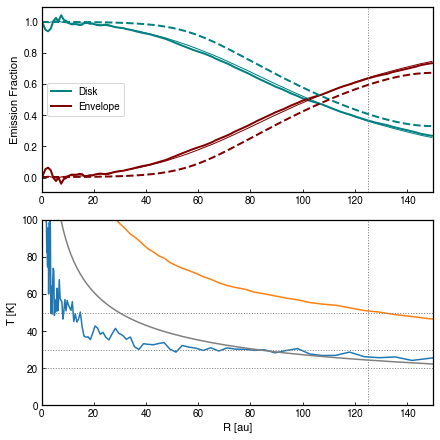

In [36]:
md = md0
o = md0_870
f,ax = subplots(2,1,constrained_layout=True)
f.set_size_inches((6,6))
ii = o.z_slice(o.I,z=0)

sca(ax[0])
plot(o.x, ii['disk']/ii['both'],lw=2,color='teal',label="Disk")
plot(o.x, ii['env']/ii['both'],lw=2,color='maroon',label="Envelope")
legend()

ii = {}
for k in o.I.keys():
    ii[k] = np.sum(o.I[k],axis=0)


plot(o.x, ii['disk']/ii['both'],lw=1,color='teal',label="Disk")
plot(o.x, ii['env']/ii['both'],lw=1,color='maroon',label="Envelope")

ii = o.z_slice(o.Ic,z=0)
plot(o.x, ii['disk']/ii['both'],lw=2,color='teal',ls='dashed')
plot(o.x, ii['env']/ii['both'],lw=2,color='maroon',ls='dashed')


axvline(125,ls='dotted',lw=1,color='gray')
xlim(0,150)

ylabel('Emission Fraction')
#title('z=0')


sca(ax[1])

h1 = int(np.int(90 - np.degrees(np.arccos(md.m.H(125)/125)))/2.)
print(h1)
print(md.m.H(125)*2)
Td_mid = np.average(md.T['dust'][:,-h1-1:-1],axis=1)
zau = 48
h2 = int(np.int(90 - np.degrees(np.arccos(zau/100))))
Td_upper = np.average(md.T['dust'][:,-h2*2:-h2],axis=1)
Td_eq = md.m.T(md.r)

plot(md.r, Td_mid ,color='C0')
plot(md.r, Td_upper,color='C1')
plot(md.r, Td_eq,color='gray')
axvline(125,ls='dotted',lw=1,color='gray')
axhline(30,ls='dotted',lw=1,color='gray')
axhline(20,ls='dotted',lw=1,color='gray')
axhline(50,ls='dotted',lw=1,color='gray')
ylim(0,100)
xlim(0,150)
xlabel('R [au]')
ylabel('T [K]')

Text(0, 0.5, 'T [K]')

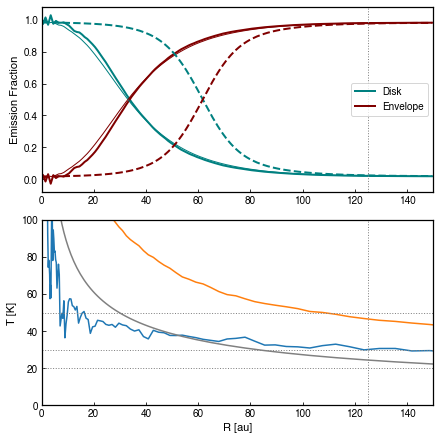

In [37]:
md = md1
o = md1_870
f,ax = subplots(2,1,constrained_layout=True)
f.set_size_inches((6,6))
ii = o.z_slice(o.I,z=0)

sca(ax[0])
plot(o.x, ii['disk']/ii['both'],lw=2,color='teal',label="Disk")
plot(o.x, ii['env']/ii['both'],lw=2,color='maroon',label="Envelope")
legend()

ii = {}
for k in o.I.keys():
    ii[k] = np.sum(o.I[k],axis=0)


plot(o.x, ii['disk']/ii['both'],lw=1,color='teal',label="Disk")
plot(o.x, ii['env']/ii['both'],lw=1,color='maroon',label="Envelope")

ii = o.z_slice(o.Ic,z=0)
plot(o.x, ii['disk']/ii['both'],lw=2,color='teal',ls='dashed')
plot(o.x, ii['env']/ii['both'],lw=2,color='maroon',ls='dashed')


axvline(125,ls='dotted',lw=1,color='gray')
xlim(0,150)

ylabel('Emission Fraction')
#title('z=0')


sca(ax[1])


h1 = int(np.int(90 - np.degrees(np.arccos(md.m.H(125)/125)))/2.)
Td_mid = np.average(md.T['dust'][:,-h1-1:-1],axis=1)
zau = 48
h2 = int(np.int(90 - np.degrees(np.arccos(zau/100))))
Td_upper = np.average(md.T['dust'][:,-h2*2:-h2],axis=1)
Td_eq = md.m.T(md.r)

plot(md.r, Td_mid ,color='C0')
plot(md.r, Td_upper,color='C1')
plot(md.r, Td_eq,color='gray')
axvline(125,ls='dotted',lw=1,color='gray')
axhline(30,ls='dotted',lw=1,color='gray')
axhline(20,ls='dotted',lw=1,color='gray')
axhline(50,ls='dotted',lw=1,color='gray')
ylim(0,100)
xlim(0,150)
xlabel('R [au]')
ylabel('T [K]')

7


Text(0, 0.5, 'T [K]')

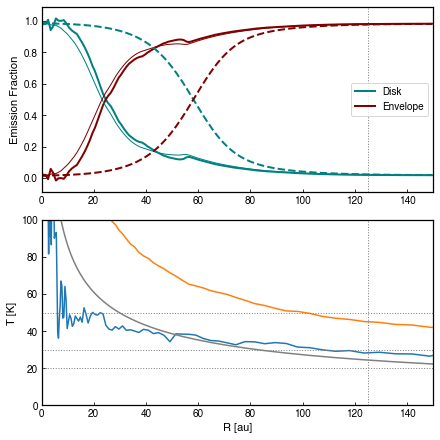

In [35]:
md = md2
o = md2_870
f,ax = subplots(2,1,constrained_layout=True)
f.set_size_inches((6,6))
ii = o.z_slice(o.I,z=0)

sca(ax[0])
plot(o.x, ii['disk']/ii['both'],lw=2,color='teal',label="Disk")
plot(o.x, ii['env']/ii['both'],lw=2,color='maroon',label="Envelope")
legend()

ii = {}
for k in o.I.keys():
    ii[k] = np.sum(o.I[k],axis=0)


plot(o.x, ii['disk']/ii['both'],lw=1,color='teal',label="Disk")
plot(o.x, ii['env']/ii['both'],lw=1,color='maroon',label="Envelope")

ii = o.z_slice(o.Ic,z=0)
plot(o.x, ii['disk']/ii['both'],lw=2,color='teal',ls='dashed')
plot(o.x, ii['env']/ii['both'],lw=2,color='maroon',ls='dashed')


axvline(125,ls='dotted',lw=1,color='gray')
xlim(0,150)

ylabel('Emission Fraction')
#title('z=0')


sca(ax[1])

h1 = int(np.int(90 - np.degrees(np.arccos(md.m.H(125)/125)))/2.)
print(h1)
Td_mid = np.average(md.T['dust'][:,-h1-1:-1],axis=1)
zau = 48
h2 = int(np.int(90 - np.degrees(np.arccos(zau/100))))
Td_upper = np.average(md.T['dust'][:,-h2*2:-h2],axis=1)
Td_eq = md.m.T(md.r)

plot(md.r, Td_mid ,color='C0')
plot(md.r, Td_upper,color='C1')
plot(md.r, Td_eq,color='gray')
axvline(125,ls='dotted',lw=1,color='gray')
axhline(30,ls='dotted',lw=1,color='gray')
axhline(20,ls='dotted',lw=1,color='gray')
axhline(50,ls='dotted',lw=1,color='gray')
ylim(0,100)
xlim(0,150)
xlabel('R [au]')
ylabel('T [K]')

Text(0, 0.5, '$I_{\\nu}(R)/I_{\\nu}$')

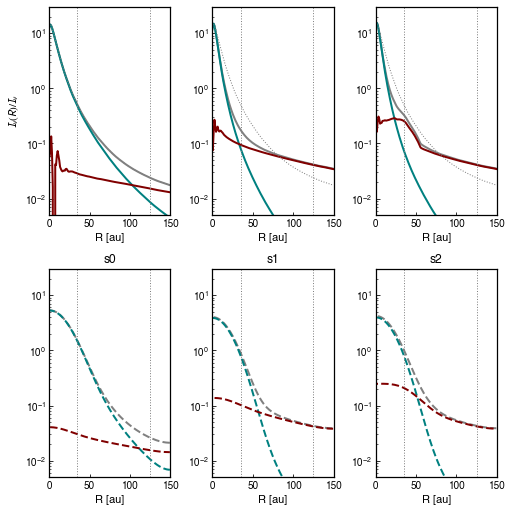

In [44]:
f,ax = subplots(2,3,constrained_layout=True)
f.set_size_inches((7,7))
for a1,a2,o,md,name in zip(ax[0,:], ax[1,:],[md0_870,md1_870,md2_870],[md0,md1,md2],['s0','s1','s2']):
    sca(a1)
    ii = {}
    for k in o.I.keys():
        ii[k] = np.sum(o.I[k]*o.conv,axis=0)

    sum_all = md0_870.Fint['both']/md0_870.nx
    fid_all = np.sum(md0_870.I['both']*md0_870.conv,axis=0)

    plot(o.x, ii['both']/sum_all,lw=2,color='gray',label="both")
    plot(o.x, ii['disk']/sum_all ,lw=2,color='teal',label="Disk")
    plot(o.x, ii['env']/sum_all,lw=2,color='maroon',label="Envelope")
    plot(o.x, fid_all/sum_all, lw=1,color='gray',ls='dotted')
    
    sca(a2)
    ii = {}
    for k in o.I.keys():
        ii[k] = np.sum(o.Ic[k]*o.conv,axis=0)

    sum_all = md0_870.Fint['both']/md0_870.nx

    plot(o.x, ii['both']/sum_all,lw=2,color='gray',ls='dashed',label="both")
    plot(o.x, ii['disk']/sum_all ,lw=2,color='teal',ls='dashed',label="Disk")
    plot(o.x, ii['env']/sum_all,lw=2,color='maroon',ls='dashed',label="Envelope")


    for aa in [a1,a2]:
        sca(aa)
        axvline(125,ls='dotted',lw=1,color='gray')
        axvline(35,ls='dotted',lw=1,color='gray')
        xlim(0,150)
        yscale('log')
        ylim(5e-3,30)
        xlabel('R [au]')
    title(name)
sca(ax[0,0])
ylabel(r'$I_{\nu}(R)/I_{\nu}$')


2.041241452319315

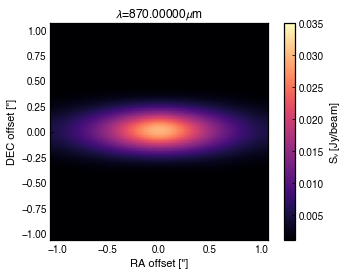

{'implot': <matplotlib.image.AxesImage at 0x7ff10ceae6a0>,
 'cbar': <matplotlib.colorbar.Colorbar at 0x7ff10ce94fa0>}

In [58]:
o = md0_870
ii = o.i_bo.imConv(fwhm=o.fwhm, pa=0., dpc=o.dpc)
rpy.image.plotImage(ii,log=False,arcsec=True,dpc=o.dpc, cmap='magma',bunit='jy/beam',vmin=0.001,vmax=0.035)

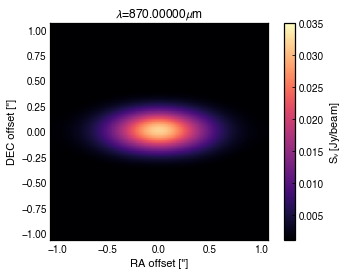

{'implot': <matplotlib.image.AxesImage at 0x7ff1132cf7c0>,
 'cbar': <matplotlib.colorbar.Colorbar at 0x7ff11331c3d0>}

In [57]:
o = md1_870
ii = o.i_bo.imConv(fwhm=o.fwhm, pa=0., dpc=o.dpc)
rpy.image.plotImage(ii,log=False,arcsec=True,dpc=o.dpc, cmap='magma',bunit='jy/beam',vmin=0.001,vmax=0.035)

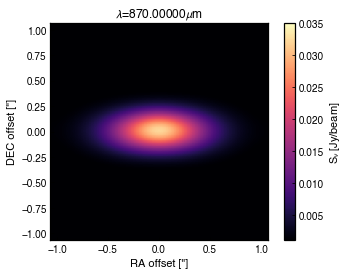

{'implot': <matplotlib.image.AxesImage at 0x7ff112b4f130>,
 'cbar': <matplotlib.colorbar.Colorbar at 0x7ff112a28d00>}

In [56]:
o = md2_870
ii = o.i_bo.imConv(fwhm=o.fwhm, pa=0., dpc=o.dpc)
rpy.image.plotImage(ii,log=False,arcsec=True,dpc=o.dpc, cmap='magma',bunit='jy/beam',vmin=0.001,vmax=0.035)

In [4]:
def make_continuum_image(output,envelope=True):
    model=output.m
    write_main(model,scat=1,lines=0)
    if os.getcwd() != model.outdir:
        os.chdir(model.outdir)
    write_dust_density(model,envelope=envelope)
    rpy.image.makeImage(**params)
    im=rpy.image.readImage(binary=False)
    return im

def plot_image(im,**params):
    if 'res_au' in params:
        if 'dpc' in params:
            dpc = params['dpc']
        else:
            dpc = 100
        theta_au = 206265*(AU/(dpc*pc))
        fwhm = theta_au*params['res_au']
        cim = im.imConv(fwhm=[fwhm, fwhm], pa=0., dpc=dpc)
        params['dpc'] = dpc
        del params['res_au']
        rpy.image.plotImage(cim, log=True,arcsec=True,**params)
        print('res required: {} arcsec at {} pc'.format(fwhm,dpc))
    else:
        rpy.image.plotImage(im,log=True,au=True, **params)
        
def plot_radial_slice(im,**params):
    if 'res_au' in params:
        if 'dpc' in params:
            dpc = params['dpc']
        else:
            dpc = 100
        theta_au = 206265*(AU/(dpc*pc))
        fwhm = theta_au*params['res_au']
        imarr = im.imConv(fwhm=[fwhm, fwhm], pa=0., dpc=dpc).image
    else:
        imarr = im.image
    if imarr.ndim > 2:
        imarr = imarr[:,:,int(im.nfreq/2)-1]
    i0 = np.amax(imarr)
    if 'offset_x' in params:
        index = int(im.nx/2) -1 + int(im.nx*params['offset_x']/np.amax(im.x/AU))
        im_slice = imarr[:,index]
        plot(im.x/AU, im_slice/i0,lw=2)
    if 'offset_y' in params:
        index = int(im.ny/2) -1 + int(im.ny*params['offset_y']/np.amax(im.y/AU))
        im_slice = imarr[index,:]
        plot(im.y/AU, im_slice/i0,lw=2)
        
def slice_I(im,dz = 0,**params):
    if 'res_au' in params:
        if 'dpc' in params:
            dpc = params['dpc']
        else:
            dpc = 100
        theta_au = 206265*(AU/(dpc*pc))
        fwhm = theta_au*params['res_au']
        imarr = im.imConv(fwhm=[fwhm, fwhm], pa=0., dpc=dpc).image
    else:
        imarr = im.image
    if imarr.ndim > 2:
        imarr = imarr[:,:,int(im.nfreq/2)-1]
    index = int(im.ny/2) -1 + int(0.5*im.ny*dz/np.amax(im.y/AU))
    im_slice = imarr[index,:]
    return im_slice

def sum_I(im,**params):
    if 'res_au' in params:
        if 'dpc' in params:
            dpc = params['dpc']
        else:
            dpc = 100
        theta_au = 206265*(AU/(dpc*pc))
        fwhm = theta_au*params['res_au']
        imarr = im.imConv(fwhm=[fwhm, fwhm], pa=0., dpc=dpc).image
    else:
        imarr = im.image
    if imarr.ndim > 2:
        imarr = imarr[:,:,int(im.nfreq/2)-1]
    im_slice = np.sum(imarr,axis=0)
    return im_slice
        
def make_radial_I(output, lam=2600,incl=90):
    model=output.m
    write_main(model,scat=1,lines=0)
    if os.getcwd() != model.outdir:
        os.chdir(model.outdir)
    cmd = 'radmc3d image circ lambda {} incl {}'.format(lam,incl)
    os.system(cmd)
    im=rpy.image.readcircimage()
    return im

In [ ]:
im_disk = make_continuum_image(md0,envelope=False,wav=870,incl=85,sizeau=300,npix=300)
im_both = make_continuum_image(md0,envelope=True,wav=870,incl=85,sizeau=300,npix=300)